# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
 ! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.5 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import spacy
nlp = spacy.load("en_core_web_sm")  # Load the English language model

In [3]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [4]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [5]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [6]:
# check for missing values
X.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [7]:
# check for duplicates
X.duplicated().sum()

0

In [8]:
# check for outliers 
X.describe()

,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000


### Let's create a visualization for the age distribution of reviewers in intervals such as 0-5, 5-10, 10-15, etc., to analyze the data.

In [9]:
X.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name'],
      dtype='object')

In [10]:
X["Age"]

0        60
1        50
2        47
3        49
4        39
         ..
18437    34
18438    48
18439    31
18440    28
18441    52
Name: Age, Length: 18442, dtype: int64

/tmp/ipykernel_13/2012533226.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


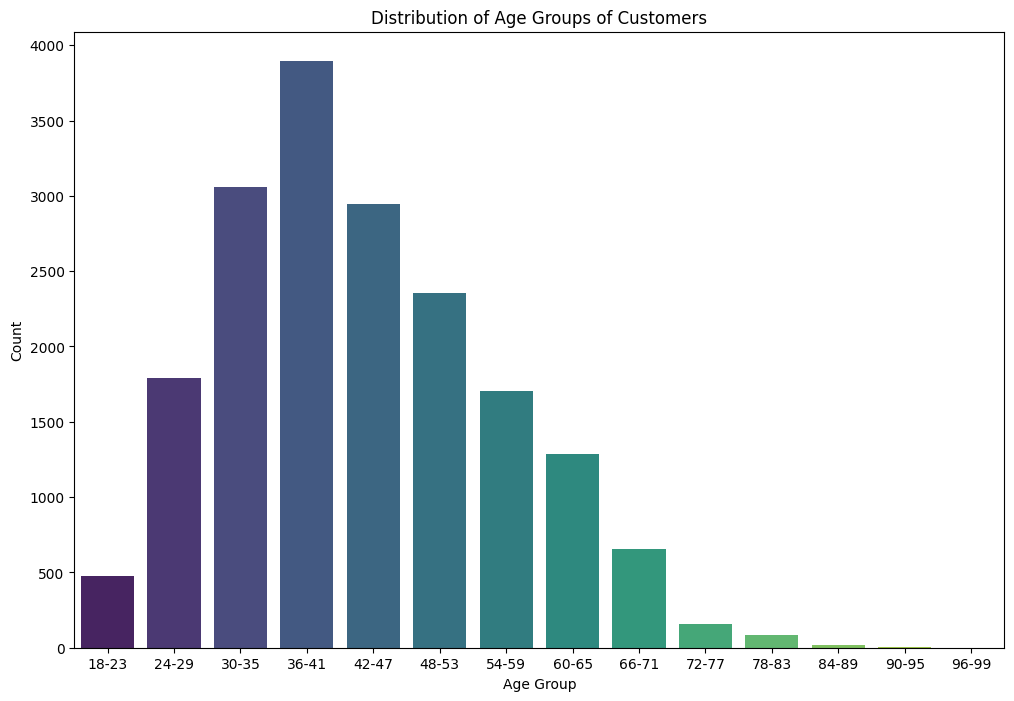

In [11]:
bins = [18, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 99]  
labels = ['18-23', '24-29', '30-35', '36-41', '42-47', '48-53', '54-59', '60-65', 
          '66-71', '72-77', '78-83', '84-89', '90-95', '96-99']

age_groups = pd.cut(X['Age'], bins=bins, labels=labels, right=True)

age_group_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

plt.title('Distribution of Age Groups of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [12]:
age_group_counts

Age
18-23     475
24-29    1793
30-35    3062
36-41    3895
42-47    2947
48-53    2353
54-59    1702
60-65    1287
66-71     655
72-77     160
78-83      84
84-89      16
90-95       8
96-99       1
Name: count, dtype: int64

### From this, we can see that the highest number of reviewers are in the age group of 36 to 41

### Let's check which has the highest Positive Feedback Count.

In [13]:
X.loc[X["Positive Feedback Count"].idxmax()]

Clothing ID                                                             1092
Age                                                                       34
Title                                   Beware if you're fuller in the chest
Review Text                I loved the lace detailing all over this dress...
Positive Feedback Count                                                  122
Division Name                                                        General
Department Name                                                      Dresses
Class Name                                                           Dresses
Name: 5689, dtype: object

### Let's see the distribution between recommended and not recommended.

/tmp/ipykernel_13/3496912335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended.index, y = recommended.values,palette='viridis')


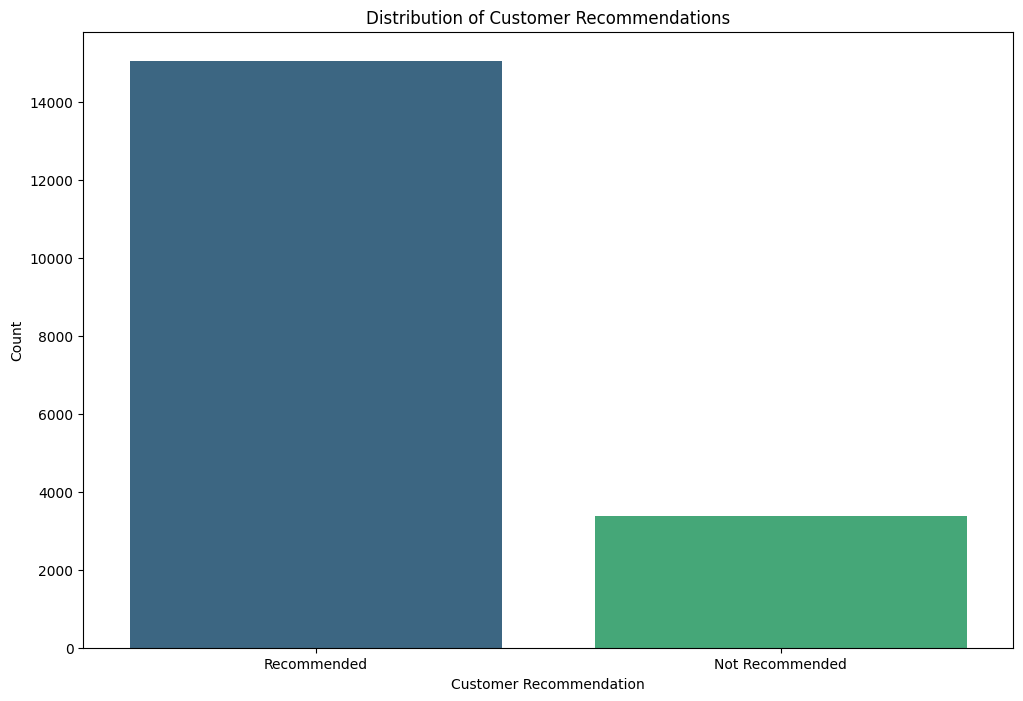

In [14]:
plt.figure(figsize=(12, 8))
recommended=y.value_counts()
recommended.index = ['Not Recommended' if i == 0 else 'Recommended' for i in recommended.index]
sns.barplot(x=recommended.index, y = recommended.values,palette='viridis')
plt.title('Distribution of Customer Recommendations')
plt.xlabel('Customer Recommendation')
plt.ylabel('Count')
plt.show()

## Building Pipeline

In [15]:
#split data into numerical, categorical, and text features

num_features = (
    X
    .select_dtypes(exclude=['object']).columns
    .drop(
        [
            'Clothing ID',# we dont use this for prediction
        ],
    )
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Title',
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[[
        'Review Text',
    ]].columns
)
print ('Review Text features:', text_features)


Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Title', 'Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Review Text'], dtype='object')


## Numerical Features Pipeline

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

## Categorical Features Pipeline

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Text Feature Pipeline

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
# Takes in a string for the character to count
# Outputs the number times that character appears in the text

class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]

In [19]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
])

# create a pipeline for counting the number of spaces, `!`, and `?`


feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=' ')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x786f881a3270>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=' ')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?'))]))])

In [20]:
#Create your SpacyLemmatizer
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized   

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x786f881a3270>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x786f0df8a3b0>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

## Combine Feature Engineering Pipelines

In [22]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHot...
                                 Index(['Review Text'], dtype='object')),
                                ('tfidf_text',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x786f881a3270>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x786f0df8a3b0>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Review Text'], dtype='object'))])

## Training Pipeline

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x786f881a3270>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x786f0df8a3b0>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

In [24]:
from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.843360433604336


## Fine-Tuning Pipeline

In [28]:
from sklearn.model_selection import RandomizedSearchCV


my_distributions = dict(
    randomforestclassifier__max_features=[50, 100, 150],  # Smaller feature space
    randomforestclassifier__n_estimators=[100, 150],      # Lower number of estimators
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=3,    
    cv=3,         
    n_jobs=-1,    
    refit=True,   
    verbose=2,    
    random_state=27,
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END randomforestclassifier__max_features=50, randomforestclassifier__n_estimators=150; total time= 2.2min
[CV] END randomforestclassifier__max_features=50, randomforestclassifier__n_estimators=150; total time= 2.2min
[CV] END randomforestclassifier__max_features=50, randomforestclassifier__n_estimators=150; total time= 2.3min
[CV] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=100; total time= 2.2min
[CV] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=100; total time= 2.2min
[CV] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=100; total time= 2.1min
[CV] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150; total time= 2.7min
[CV] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150; total time= 2.6min
[CV] END randomforestclassifier__max_features=15

{'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__max_features': 150}

In [29]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                                   FunctionTransformer(func=<function reshape at 0x786f881a3270>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x786efd9e0460>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=150, n_estimators=150,
                                        random_state=27))])

In [30]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8444444444444444
